In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

In [2]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [14, 8]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

In [3]:
import statsmodels as sm
sm.__version__

'0.14.0.dev400+gebf934b9c'

In [4]:
folder = Path('../../datasets/Ch15/')
file = folder.joinpath('AEP_hourly.csv')

df = pd.read_csv(file, index_col='Datetime', parse_dates=True)
df.sort_index(inplace=True)
df = df.resample('H').max()
df.ffill(inplace=True)

In [5]:
df.isna().sum()

AEP_MW    0
dtype: int64

In [6]:
df.shape

(121296, 1)

In [7]:
set(df.index.year)

{2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018}

<AxesSubplot:xlabel='Datetime'>

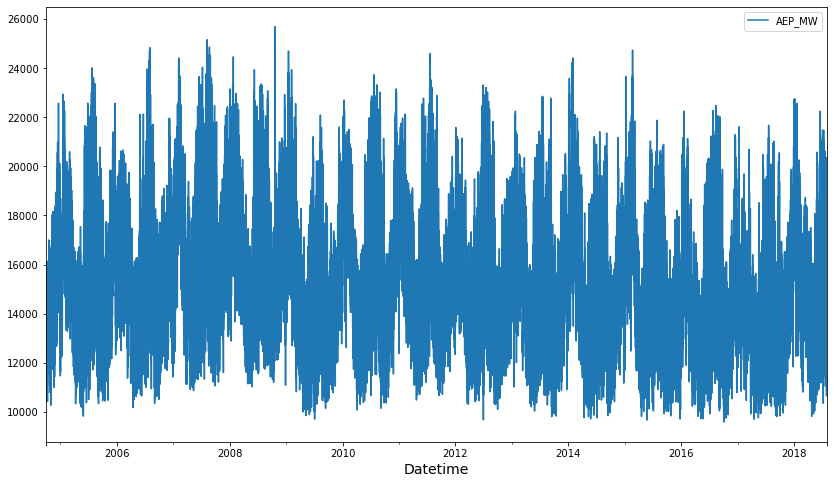

In [8]:
df.plot()

# Decomposing Time Series with Multiple Seasonality using MSTL

In [11]:
from statsmodels.tsa.seasonal import MSTL
plt.rcParams["figure.figsize"] = [14, 10]

In [12]:
df.index.freq

<Hour>

In [28]:
mstl = MSTL(df, periods=(24, 24*7))
results = mstl.fit()

<bound method Figure.tight_layout of <Figure size 1008x720 with 5 Axes>>

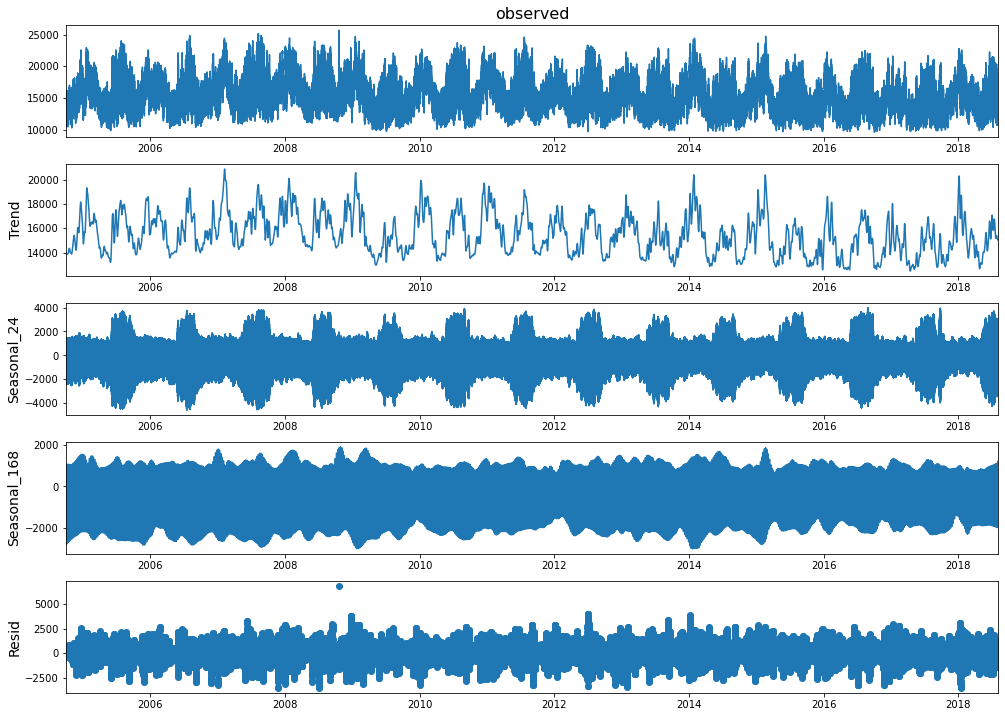

In [35]:
ax = results.plot()
ax.
ax.tight_layout

In [144]:
df.loc['2016-01-04':'2016-01-06'].index.day_name()

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday'],
      dtype='object', name='Datetime')

In [156]:
df.loc['2016-07-04':'2016-07-06'].index.day_name()

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday'],
      dtype='object', name='Datetime')

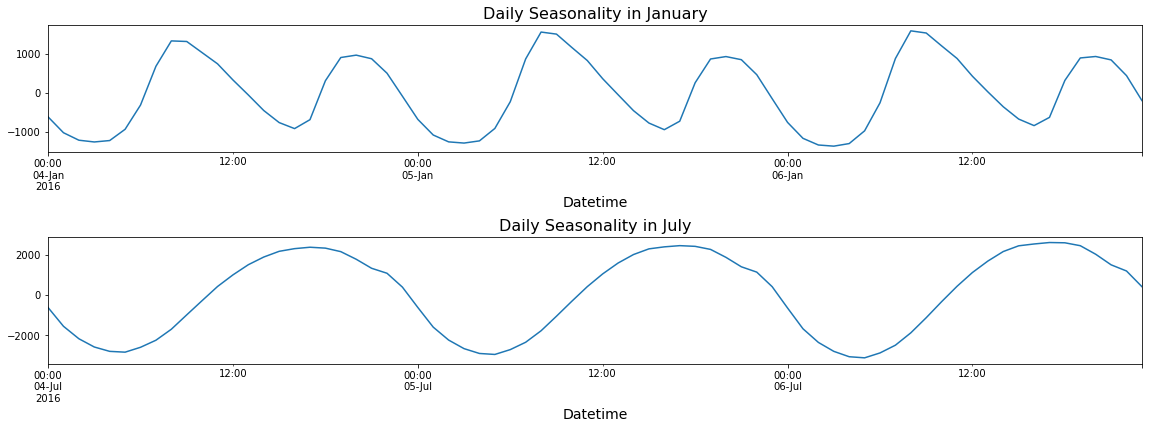

In [157]:
# mask = results.seasonal.index.month==7
fig, ax = plt.subplots(2, 1, figsize=(16, 6))
(results.seasonal['seasonal_24']
         .loc['2016-01-04':'2016-01-06']
         .plot(ax=ax[0], 
               title='Daily Seasonality in January'))
(results.seasonal['seasonal_24']
         .loc['2016-07-04':'2016-07-06']
         .plot(ax=ax[1], 
               title='Daily Seasonality in July'))
fig.tight_layout(); plt.show()

In [150]:
df.loc['2016-01-04':'2016-01-10'].index.day_name()

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='Datetime', length=168)

In [159]:
df.loc['2016-01-04':'2016-01-10'].index.day_name()

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='Datetime', length=168)

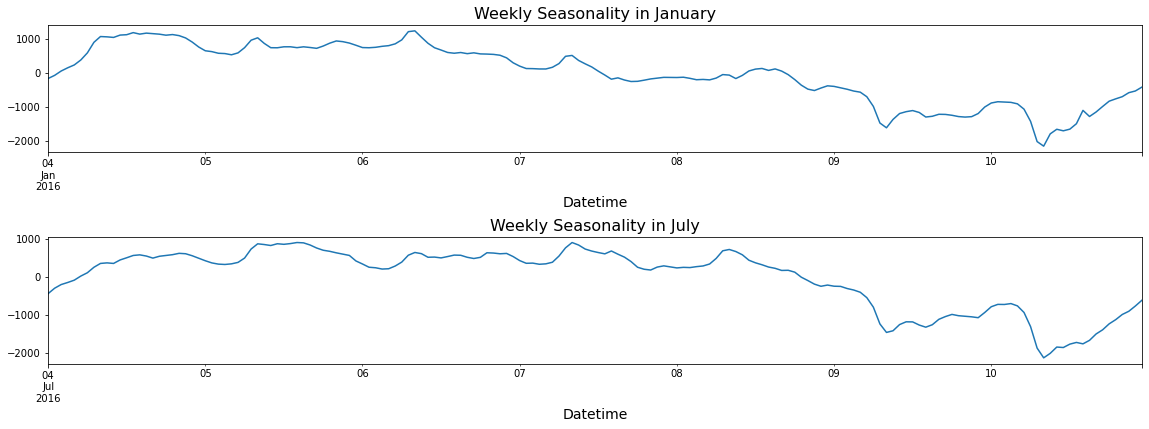

In [162]:
# mask = results.seasonal.index.month==7
fig, ax = plt.subplots(2, 1, figsize=(16, 6))
(results.seasonal['seasonal_168']
         .loc['2016-01-04':'2016-01-10']
         .plot(ax=ax[0], 
               title='Weekly Seasonality in January'))
(results.seasonal['seasonal_168']
         .loc['2016-07-04':'2016-07-10']
         .plot(ax=ax[1], 
               title='Weekly Seasonality in July'))
fig.tight_layout(); plt.show()

## There is more

In [19]:
mstl = MSTL(df, periods=(24, 24*7*52))
results = mstl.fit()

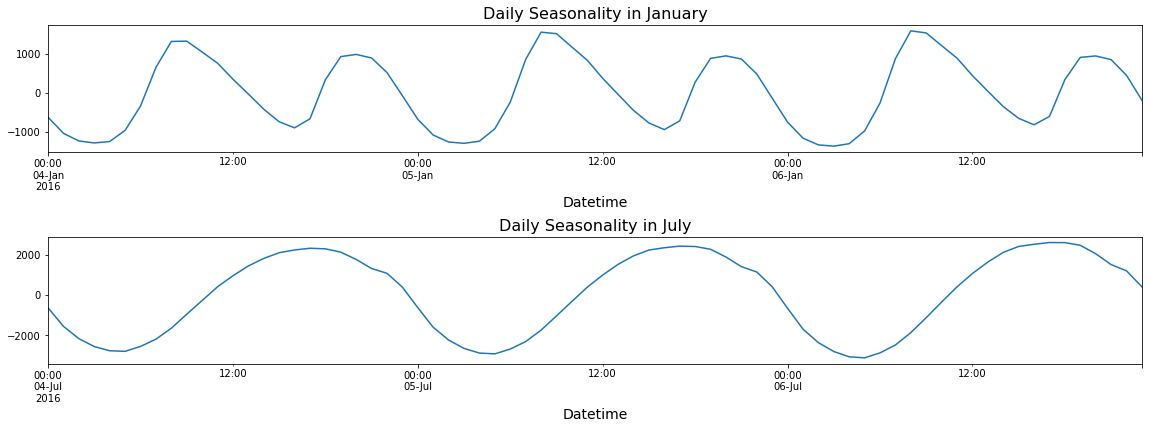

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(16, 6))
(results.seasonal['seasonal_24']
         .loc['2016-01-04':'2016-01-06']
         .plot(ax=ax[0], 
               title='Daily Seasonality in January'))
(results.seasonal['seasonal_24']
         .loc['2016-07-04':'2016-07-06']
         .plot(ax=ax[1], 
               title='Daily Seasonality in July'))
fig.tight_layout(); plt.show()

KeyError: 'seasonal_168'

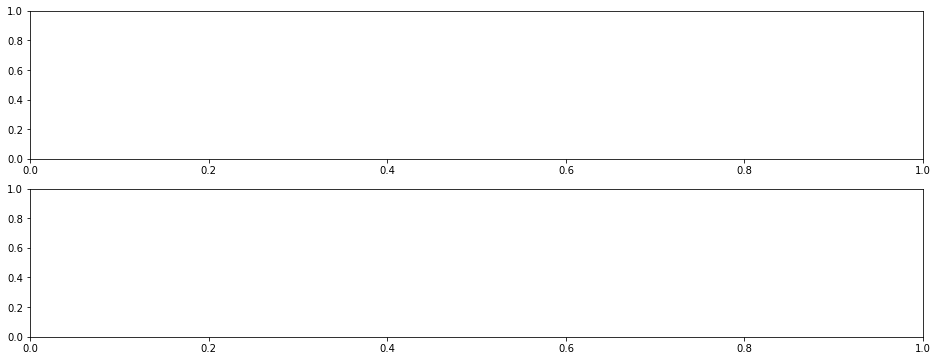

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(16, 6))
(results.seasonal['seasonal_168']
         .loc['2016-01-04':'2016-01-10']
         .plot(ax=ax[0], 
               title='Weekly Seasonality in January'))
(results.seasonal['seasonal_168']
         .loc['2016-07-04':'2016-07-10']
         .plot(ax=ax[1], 
               title='Weekly Seasonality in July'))
fig.tight_layout(); plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
(results.seasonal['seasonal_168']
         .loc['2016-01':'2016-03']
         .plot(ax=ax,title='Monthly Seasonality in January'))

# Forecasting Time Series with Multiple Seasonality Unobserved Components using (UCM)

In [ ]:
from statsmodels.tsa.api import UnobservedComponents

### Splitting the data

In [102]:
train = df.loc[:'2017-06']
test = df.loc['2017-07':]

In [108]:
len(test) + len(train) == len(df)

True

<AxesSubplot:xlabel='Datetime'>

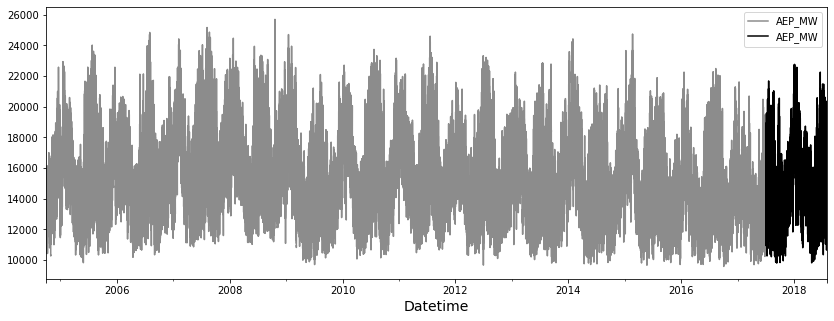

In [109]:
ax = train.plot(style='k-', alpha=0.45)
test.plot(ax=ax, style='k')

In [ ]:
 level='fixed intercept',
                                    freq_seasonal=[{'period': 10,
                                                    'harmonics': 3},
                                                   {'period': 100,
                                                    'harmonics': 2}])

In [186]:
model = UnobservedComponents(train,
                            level='fixed intercept',
                            freq_seasonal=[{'period': 10,
                                            'harmonics': 3},
                                            {'period': 100,
                                            'harmonics': 2}])

available `.fit()` methods. Default is `lbfgs`
```
    'newton' for Newton-Raphson
    'nm' for Nelder-Mead
    'bfgs' for Broyden-Fletcher-Goldfarb-Shanno (BFGS)
    'lbfgs' for limited-memory BFGS with optional box constraints
    'powell' for modified Powell's method
    'cg' for conjugate gradient
    'ncg' for Newton-conjugate gradient
    'basinhopping' for global basin-hopping solver
 ```

In [187]:
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.87046D+00    |proj g|=  5.22064D-04

At iterate    5    f=  7.84165D+00    |proj g|=  3.38898D-03
  ys=-2.659E-02  -gs= 9.632E-02 BFGS update SKIPPED

At iterate   10    f=  7.73701D+00    |proj g|=  4.68502D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     45      1     1     0   6.404D-08   7.737D+00
  F =   7.7370089419479759     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


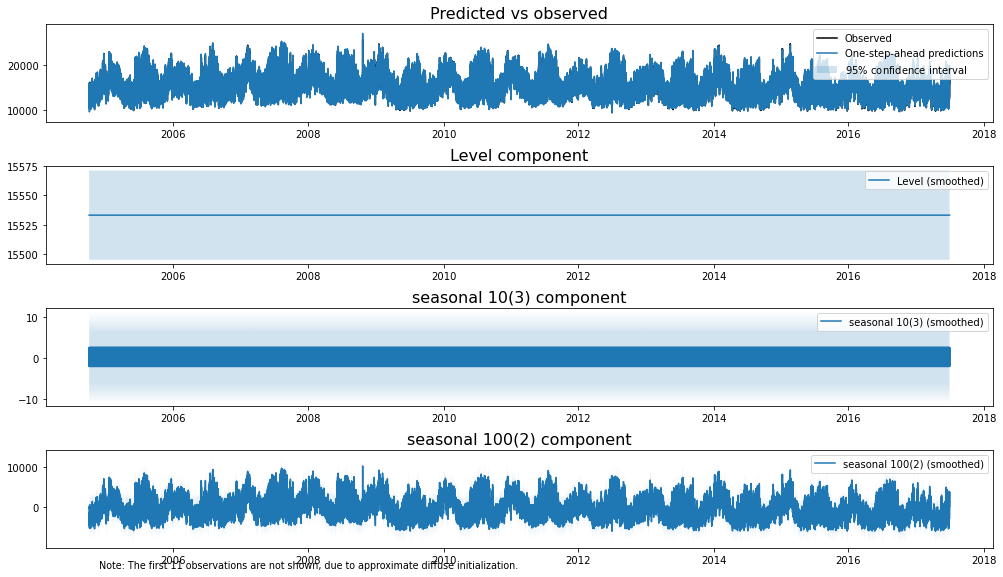

In [188]:
plt.rcParams["figure.figsize"] = [14, 8] 
ax = results.plot_components()
ax.tight_layout()

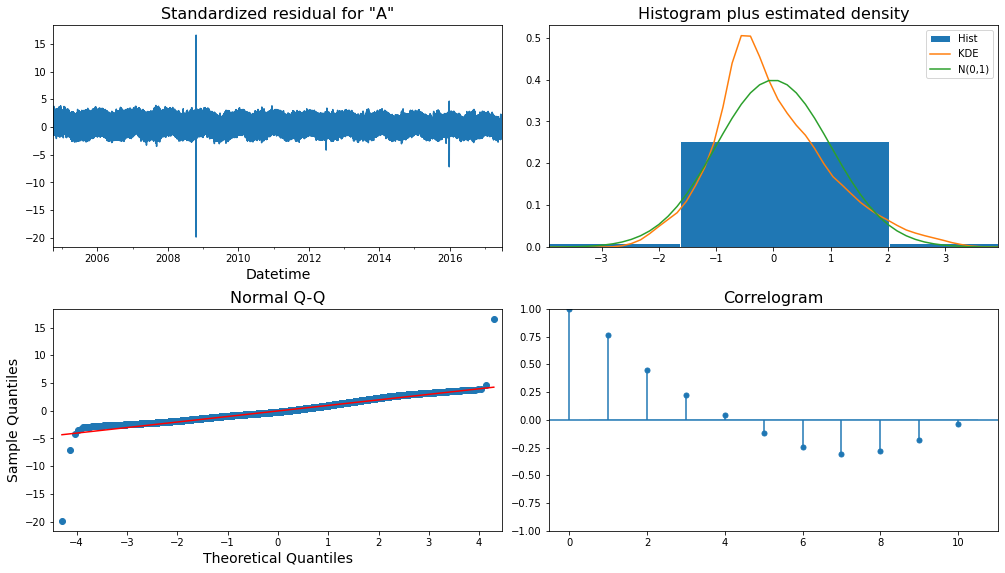

In [189]:
ax = results.plot_diagnostics()
ax.tight_layout()

In [190]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                Unobserved Components Results                                 
==============================================================================================
Dep. Variable:                                 AEP_MW   No. Observations:               111743
Model:                                fixed intercept   Log Likelihood             -864556.590
                    + stochastic freq_seasonal(10(3))   AIC                        1729117.180
                   + stochastic freq_seasonal(100(2))   BIC                        1729136.428
Date:                                Wed, 11 May 2022   HQIC                       1729122.993
Time:                                        01:12:49                                         
Sample:                                    10-01-2004                                         
                                         - 06-30-2017                                         
Covariance Type:                                  opg                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
sigma2.freq_seasonal_10(3)    2.73e-11      0.001   4.12e-08      1.000      -0.001       0.001
sigma2.freq_seasonal_100(2)  1.341e+05    387.759    345.906      0.000    1.33e+05    1.35e+05
===================================================================================
Ljung-Box (L1) (Q):               65095.98   Jarque-Bera (JB):             31007.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [191]:
train

,AEP_MW
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0
...,...
2017-06-30 19:00:00,18222.0
2017-06-30 20:00:00,17520.0
2017-06-30 21:00:00,17023.0


In [192]:
test

,AEP_MW
Datetime,
2017-07-01 00:00:00,14508.0
2017-07-01 01:00:00,13424.0
2017-07-01 02:00:00,12732.0
2017-07-01 03:00:00,12224.0
2017-07-01 04:00:00,11881.0
...,...
2018-08-02 20:00:00,17673.0
2018-08-02 21:00:00,17303.0
2018-08-02 22:00:00,17001.0


<AxesSubplot:xlabel='Datetime'>

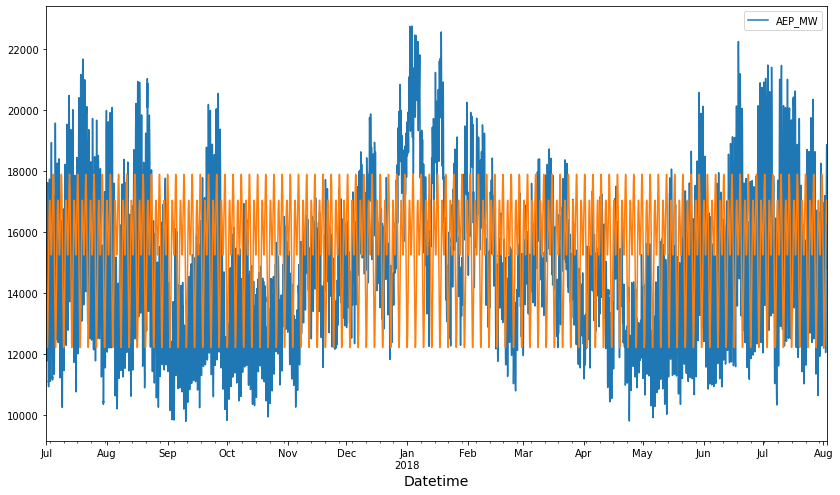

In [193]:
test.plot()
results.predict(start=test.index.min(), end=test.index.max()).plot()

NameError: name 'n' is not defined

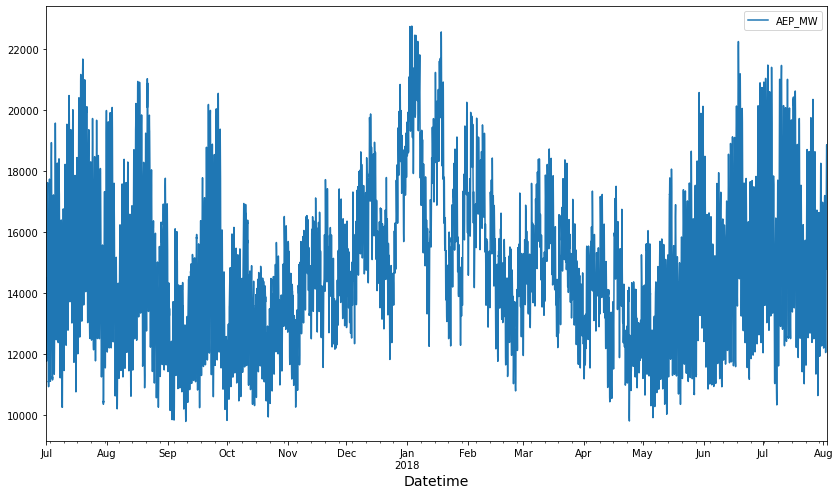

In [194]:
test.plot()
results.forecast(n(test)).plot()

# Multiple Seasonality

In [23]:
folder = Path('../../datasets/Ch15/energy/')
file = folder.joinpath('AEP_hourly.csv')

df = pd.read_csv(file, index_col='Datetime', parse_dates=True)

In [24]:
df.sort_index(inplace=True)

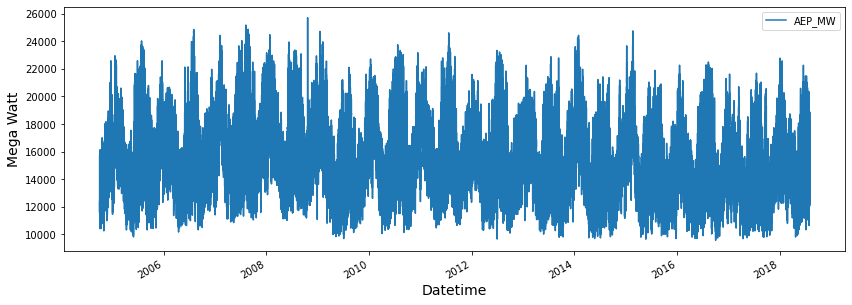

In [34]:
ax = df.plot()
ax.set_ylabel('Mega Watt')
plt.show()

In [49]:
dups = df[df.index.duplicated()].index.tolist()
dups

[Timestamp('2014-11-02 02:00:00'),
 Timestamp('2015-11-01 02:00:00'),
 Timestamp('2016-11-06 02:00:00'),
 Timestamp('2017-11-05 02:00:00')]

In [50]:
df.loc[dups]

,AEP_MW
Datetime,
2014-11-02 02:00:00,12994.0
2014-11-02 02:00:00,13190.0
2015-11-01 02:00:00,10785.0
2015-11-01 02:00:00,10542.0
2016-11-06 02:00:00,10964.0
2016-11-06 02:00:00,11008.0
2017-11-05 02:00:00,10596.0
2017-11-05 02:00:00,10446.0


In [58]:
len(set(df.index))

121269

In [54]:
len(df.index)-len(set(df.index))

4

In [57]:
pd.date_range(df.index.min(), df.index.max(), freq='H')

DatetimeIndex(['2004-10-01 01:00:00', '2004-10-01 02:00:00',
               '2004-10-01 03:00:00', '2004-10-01 04:00:00',
               '2004-10-01 05:00:00', '2004-10-01 06:00:00',
               '2004-10-01 07:00:00', '2004-10-01 08:00:00',
               '2004-10-01 09:00:00', '2004-10-01 10:00:00',
               ...
               '2018-08-02 15:00:00', '2018-08-02 16:00:00',
               '2018-08-02 17:00:00', '2018-08-02 18:00:00',
               '2018-08-02 19:00:00', '2018-08-02 20:00:00',
               '2018-08-02 21:00:00', '2018-08-02 22:00:00',
               '2018-08-02 23:00:00', '2018-08-03 00:00:00'],
              dtype='datetime64[ns]', length=121296, freq='H')

In [60]:
df = df.resample('H').max()

<AxesSubplot:xlabel='Datetime'>

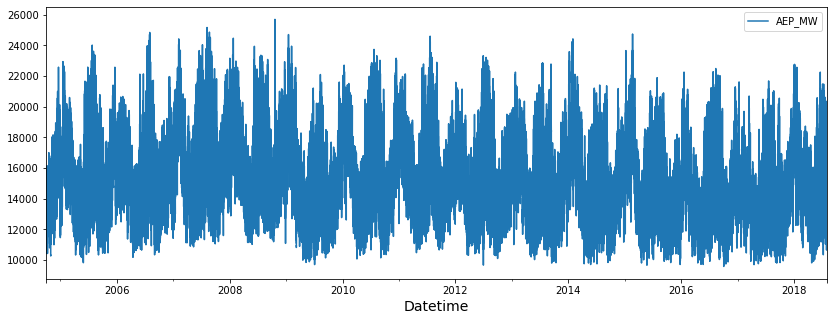

In [62]:
df.plot()

In [175]:
from statsmodels.tsa.api import UnobservedComponents

In [176]:
model = UnobservedComponents(df,
                                    level='fixed intercept',
                                    freq_seasonal=[{'period': 10,
                                                    'harmonics': 3},
                                                   {'period': 100,
                                                    'harmonics': 2}])

In [177]:
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.87187D+00    |proj g|=  5.21439D-04

At iterate    5    f=  7.84201D+00    |proj g|=  3.40925D-03
  ys=-3.083E-02  -gs= 1.008E-01 BFGS update SKIPPED

At iterate   10    f=  7.73065D+00    |proj g|=  8.60973D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     49      1     1     0   5.487D-06   7.731D+00
  F =   7.7306364502138729     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [178]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                Unobserved Components Results                                 
==============================================================================================
Dep. Variable:                                 AEP_MW   No. Observations:               121296
Model:                                fixed intercept   Log Likelihood             -937695.279
                    + stochastic freq_seasonal(10(3))   AIC                        1875394.558
                   + stochastic freq_seasonal(100(2))   BIC                        1875413.970
Date:                                Tue, 10 May 2022   HQIC                       1875400.398
Time:                                        23:02:11                                         
Sample:                                    10-01-2004                                         
                                         - 08-03-2018                                         
Covariance Type:                                  opg                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
sigma2.freq_seasonal_10(3)   1.508e-10      0.001    2.5e-07      1.000      -0.001       0.001
sigma2.freq_seasonal_100(2)  1.324e+05    373.078    354.942      0.000    1.32e+05    1.33e+05
===================================================================================
Ljung-Box (L1) (Q):               71243.08   Jarque-Bera (JB):             30727.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

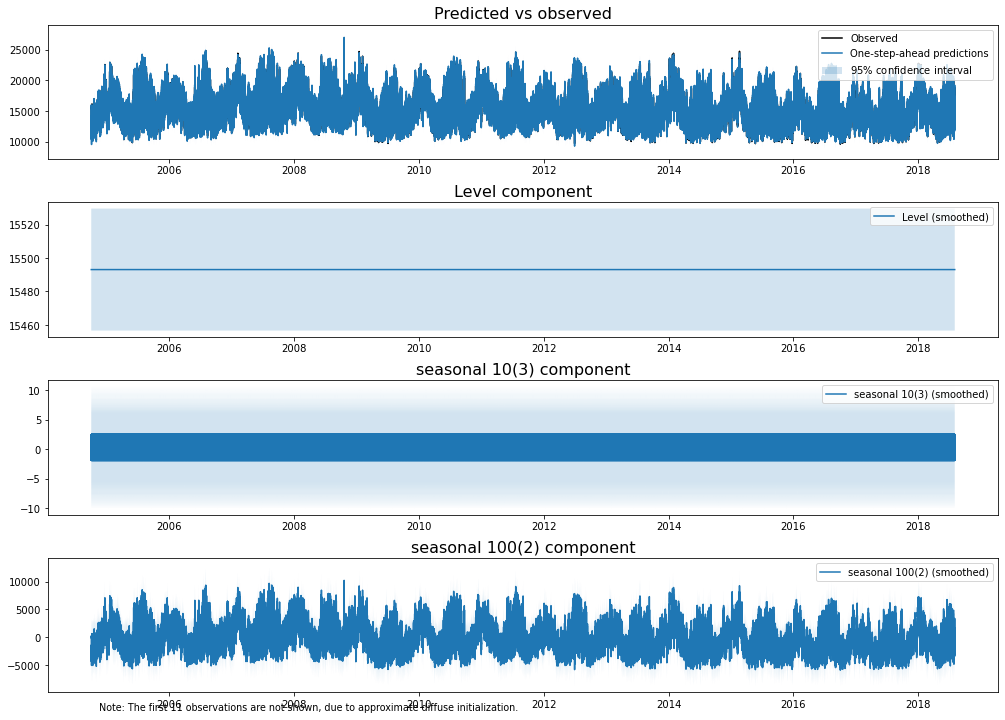

In [187]:
plt.rcParams["figure.figsize"] = [14, 10] 
ax = results.plot_components()
ax.tight_layout()

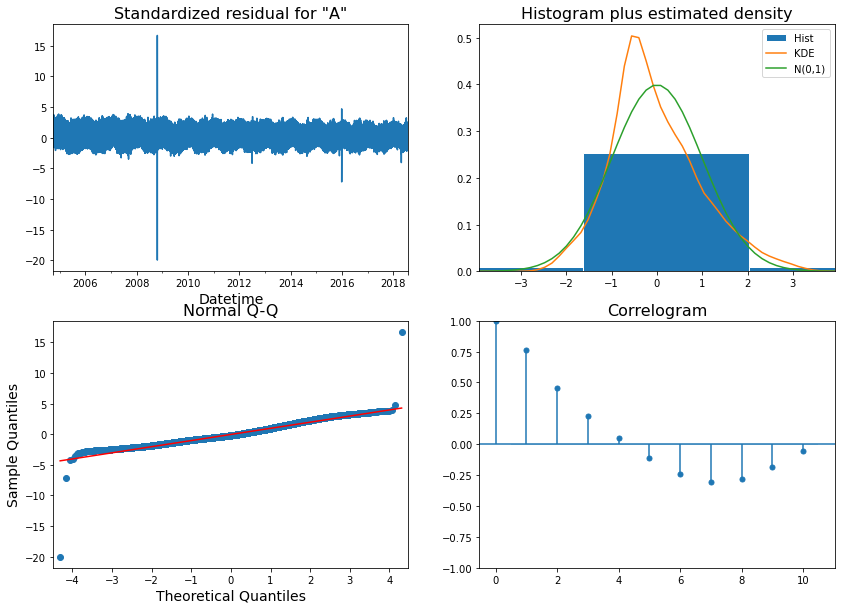

In [180]:
results.plot_diagnostics();

In [181]:
t = df.index[-1]
t + pd.DateOffset(5)

Timestamp('2018-08-08 00:00:00', freq='H')

In [182]:
t

Timestamp('2018-08-03 00:00:00', freq='H')

<AxesSubplot:xlabel='Datetime'>

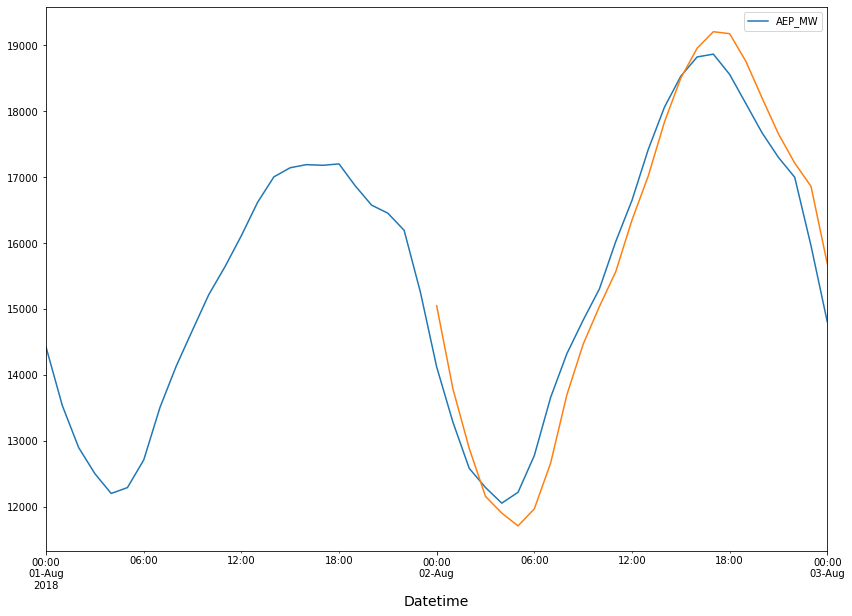

In [183]:
df.loc['2018-08'].plot()
results.predict(start=df.index.max()+pd.DateOffset(-1), end=t ).plot()

In [137]:
model = UnobservedComponents(df,
                                        level='dtrend',
                                        irregular=True,
                                        stochastic_level = False,
                                        stochastic_trend = False,
                                        stochastic_freq_seasonal = [False, False, False],
                                        freq_seasonal=[{'period': 24, 'harmonics': 1},
                                                       {'period': 168, 'harmonics': 1},
                                                       {'period': 8766, 'harmonics': 2}])
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.94725D+00    |proj g|=  3.15569D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      7      1     0     0   3.040D-06   8.906D+00
  F =   8.9055781448223570     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [138]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                            
====================================================================================
Dep. Variable:                       AEP_MW   No. Observations:               121296
Model:                  deterministic trend   Log Likelihood            -1080211.007
                     + freq_seasonal(24(1))   AIC                        2160424.013
                    + freq_seasonal(168(1))   BIC                        2160433.719
                   + freq_seasonal(8766(2))   HQIC                       2160426.933
Date:                      Tue, 10 May 2022                                         
Time:                              22:46:33                                         
Sample:                          10-01-2004                                         
                               - 08-03-2018                                         
Covariance Type:                        opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  3.173e+06   1.24e+04    254.953      0.000    3.15e+06     3.2e+06
===================================================================================
Ljung-Box (L1) (Q):              112863.90   Jarque-Bera (JB):              2964.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

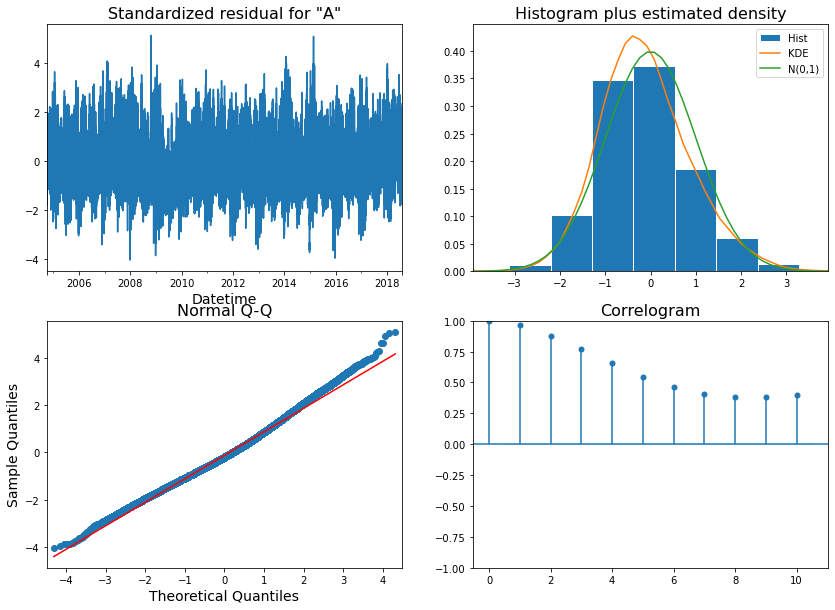

In [139]:
results.plot_diagnostics();

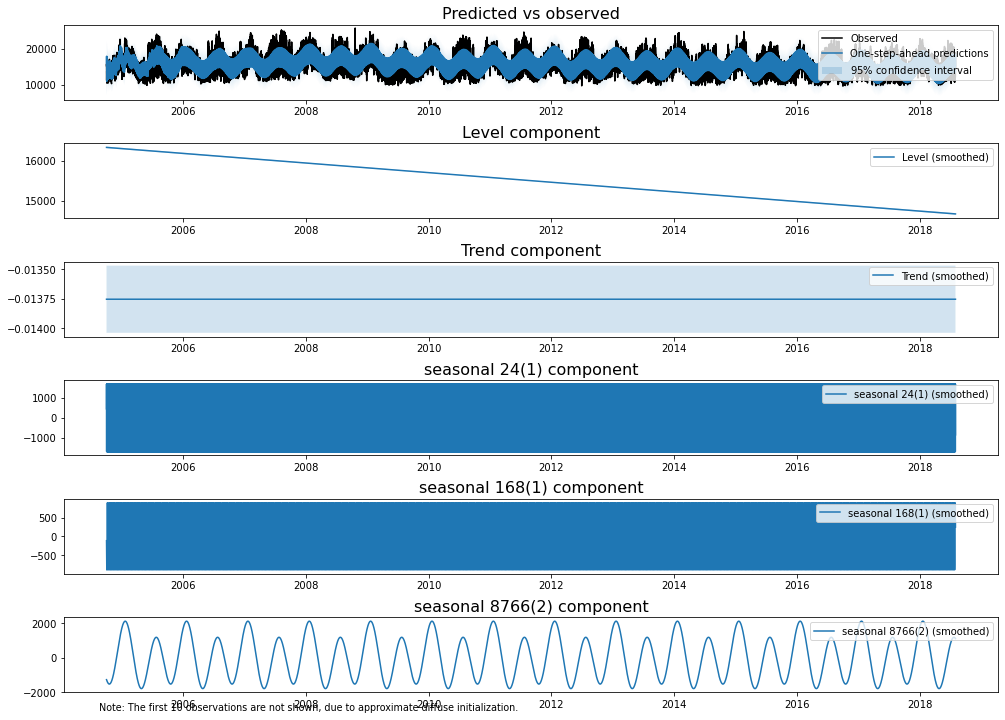

In [140]:
plt.rcParams["figure.figsize"] = [14, 10] 
ax = results.plot_components()
ax.tight_layout()

<AxesSubplot:xlabel='Datetime'>

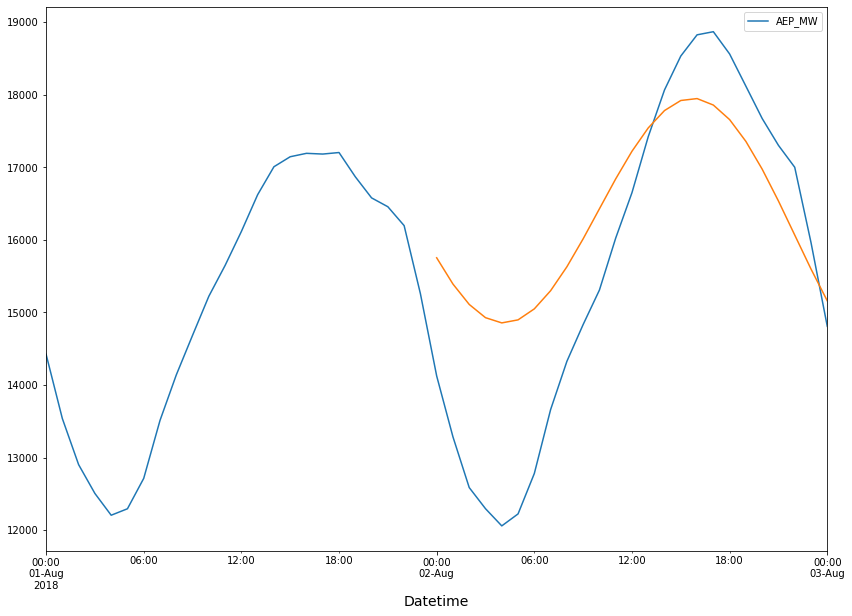

In [146]:
df.loc['2018-08'].plot()
results.predict(start=df.index.max()+pd.DateOffset(-1), end=t ).plot()

In [147]:
from sktime.forecasting.structural import UnobservedComponents
forecaster = UnobservedComponents(level='local linear trend')
results = forecaster.fit(df)

y_pred = forecaster.predict(fh=[1, 2, 3])

In [148]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                      y   No. Observations:               121296
Model:             local linear trend   Log Likelihood             -886941.172
Date:                Tue, 10 May 2022   AIC                        1773888.344
Time:                        22:48:51   BIC                        1773917.462
Sample:                    10-01-2004   HQIC                       1773897.104
                         - 08-03-2018                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0191    273.632   6.96e-05      1.000    -536.290     536.328
sigma2.level         9.7601   1238.664      0.008      0.994   -2417.976    2437.496
sigma2.trend      1.323e+05   1016.714    130.153      0.000     1.3e+05    1.34e+05
===================================================================================
Ljung-Box (L1) (Q):                4877.88   Jarque-Bera (JB):          25987179.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                            -1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

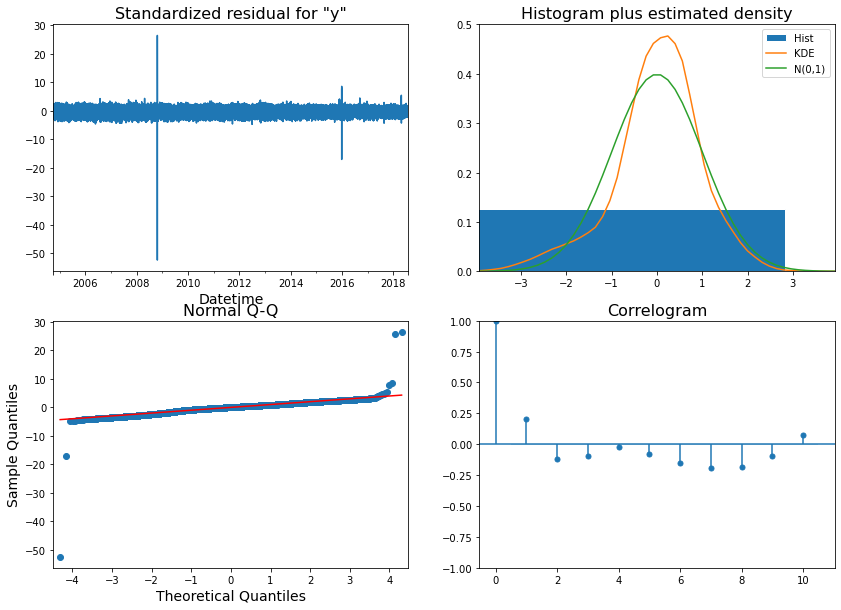

In [149]:
results.plot_diagnostics()

In [163]:
from sktime.forecasting.all import ForecastingHorizon
fh = ForecastingHorizon(np.arange(24) + 1, is_relative=True)

<AxesSubplot:xlabel='Datetime'>

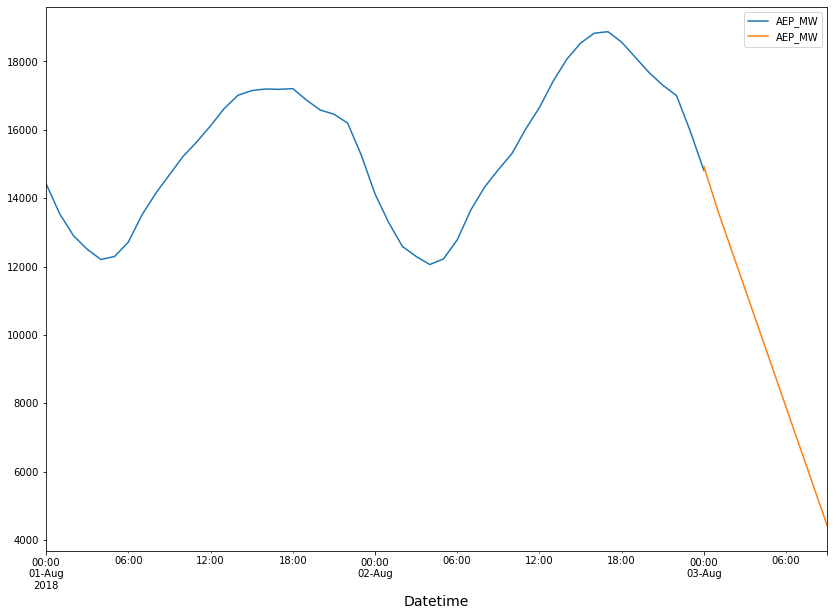

In [173]:
ax = df.loc['2018-08'].plot()
pd.concat([forecaster.predict(i) for i in range(10)]).plot(ax=ax)

In [10]:
from prophet import Prophet

folder = Path('../../datasets/Ch15/energy/')
file = folder.joinpath('AEP_hourly.csv')

df = pd.read_csv(file, parse_dates=['Datetime'])

df.columns = ['ds', 'y']

In [12]:
model = Prophet().fit(df)

Initial log joint probability = -1059.1
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        276614      0.104029       72509.8      0.4874           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        277278     0.0030257       8990.28     0.08891           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        277574    0.00142767       12237.3     0.07729           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        277715     0.0237042       6400.53           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        277809    0.00264037       2055.48           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha   

In [14]:
future = model.make_future_dataframe(24, freq='H')

In [19]:
future

,ds
0,2004-10-01 01:00:00
1,2004-10-01 02:00:00
2,2004-10-01 03:00:00
3,2004-10-01 04:00:00
4,2004-10-01 05:00:00
...,...
121288,2018-08-03 20:00:00
121289,2018-08-03 21:00:00
121290,2018-08-03 22:00:00
121291,2018-08-03 23:00:00


In [15]:
forecast = model.predict(future)

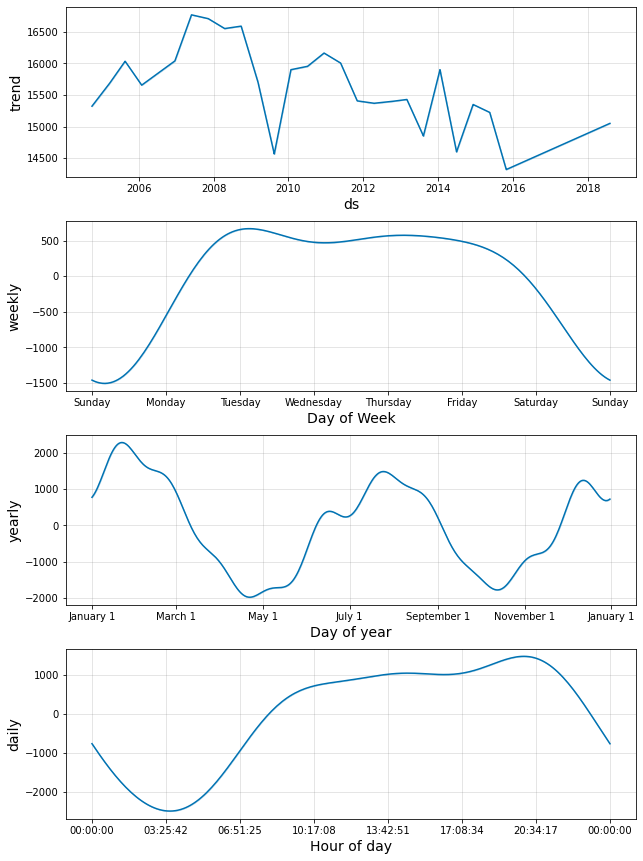

In [16]:
model.plot_components(forecast)
plt.show()

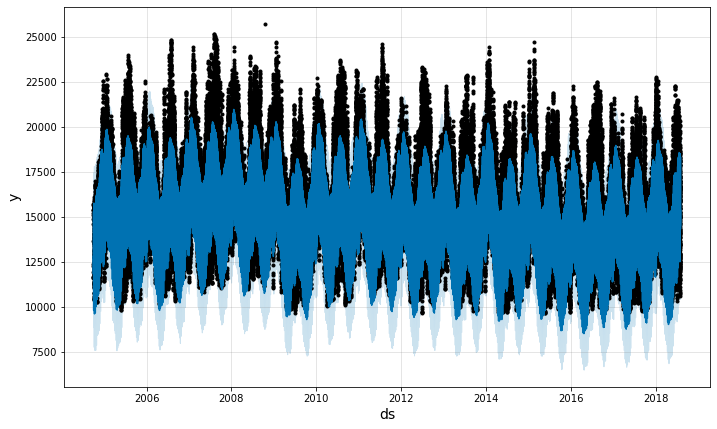

In [18]:
model.plot(forecast);

In [7]:
from sktime.datasets import load_airline
from sktime.forecasting.tbats import TBATS

In [13]:
y = load_airline()

In [25]:
df['AEP_MW']

Datetime
2004-10-01 01:00:00    12379.0
2004-10-01 02:00:00    11935.0
2004-10-01 03:00:00    11692.0
2004-10-01 04:00:00    11597.0
2004-10-01 05:00:00    11681.0
                        ...   
2018-08-02 20:00:00    17673.0
2018-08-02 21:00:00    17303.0
2018-08-02 22:00:00    17001.0
2018-08-02 23:00:00    15964.0
2018-08-03 00:00:00    14809.0
Freq: H, Length: 121296, dtype: float64

In [43]:
folder = Path('../../datasets/Ch15/energy/')
file = folder.joinpath('AEP_hourly.csv')

df = pd.read_csv(file, index_col='Datetime', parse_dates=True)
df = df.resample('H').max()

In [54]:
y = df['AEP_MW'].iloc[1000:3000]

In [55]:
y

Datetime
2004-11-11 17:00:00    16310.0
2004-11-11 18:00:00    17013.0
2004-11-11 19:00:00    17321.0
2004-11-11 20:00:00    17159.0
2004-11-11 21:00:00    16847.0
                        ...   
2005-02-02 20:00:00    19039.0
2005-02-02 21:00:00    18703.0
2005-02-02 22:00:00    18333.0
2005-02-02 23:00:00    17320.0
2005-02-03 00:00:00    16394.0
Freq: H, Name: AEP_MW, Length: 2000, dtype: float64

In [56]:
forecaster = TBATS()
forecaster.fit(y)

TBATS()

In [57]:
y_pred = forecaster.predict(fh=[1,2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

<AxesSubplot:xlabel='Datetime'>

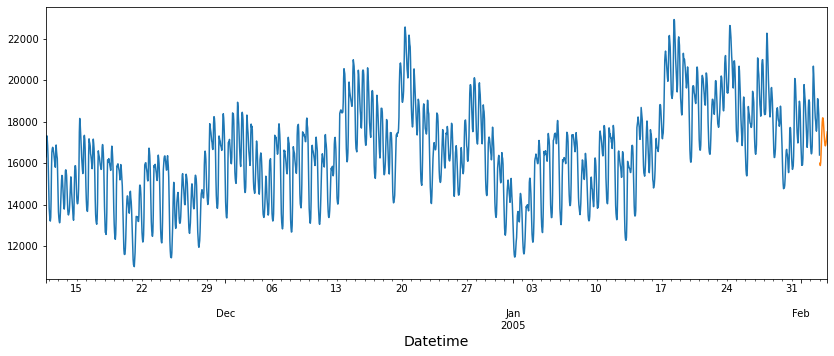

In [58]:
y.plot()
y_pred.plot()

# Survival Analysis

# Markov Switching Dynamic Regression Models

# Time Series Transformation with Kalman Filters 

# Spectral Analysis with Fourier Transforms

# Non-Linear Time Series and Regression Splines for Forecasting

# Time Series Clustering and Segmentation

# Multiple Seasonality and TBATS